<a href="https://www.kaggle.com/code/darshanprabhu09/n13-pytorch-lstm-neural-network-99-accuracy-rate?scriptVersionId=137743413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > TABLE OF CONTENTS<br><div> 
    
* [THEORY](#0)
     * [1 - TENSORS](#0.1)
     * [2 - PyTorch](#0.2)
     * [3 - LSTM model](#0.3)
    
    
* [1 - IMPORTING THE LIBRARIES](#1)
    
* [2 -DATA COLLECTION & DEVICE SETUP](#2)
    
* [3 -DATA PREPARATION ](#3)
    
* [4 - EXPLORATORY DATA ANALYSIS.](#4)
    
     * [4.1 - Closing Prices over time.](#4.1)
     * [4.2 -  Converting the data into a numpy array.](#4.2)
     * [4.3 - SCALING THE VALUES.](#4.3)
     * [4.4 - DEFINING DEPENDENT AND INDEPENDENT VARIABLES](#4.4)
     * [4.5 - SPLITTING THE ARRAY](#4.5)
     * [4.6 - SPLITTING "X" & "Y".](#4.6)
     * [4.7 - ARRAY RESHAPING](#4.7)
     * [4.8 - NUMPY TO TENSOR CONVERSION](#4.8)
     * [4.9 - CREATING A CUSTOM CLASSES](#4.9)
     * [4.10 - ITERATING THE DATA](#4.10)
     * [4.11 - PREPROCESSING THE DATA](#4.11)
    
    
* [5 - MODEL BUILDING](#5)
    
     * [5.1 - LSTM model](#5.1)
     * [5.2 - MODEL TRAINING](#5.2)
     * [5.3 - MODEL EVALUATION](#5.3)
     * [5.4 - FEEDING THE MODEL](#5.4)
     * [5.5 - VISUALIZING THE PREDICTIONS](#5.5)
     * [5.6 - CONVERTING SCALED VALUES INTO DOLLARS](#5.6)
     

* [6 - VISUALIZING THE OUTPUT](#6)

     * [6.1 - REMOVING THE APPLIED SCALER.](#6.1)
     * [6.2 - PLOTTING AFTER REMOVING THE APPLIED SCALER FOR TRAINING DATA](#6.2)
     * [6.3 - REMOVING SCALED VALUES FROM TEST PREDICTIONS](#6.3)
     * [6.4 - REMOVING THE APPLIED SCALER AND PLOTTING TESTING DATA.](#6.4)

     
     
     
* [7 - CONCLUSION](#7)

* [8 - NOTE](#8)

# <a id = "0"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > THEORY <br><div> 

# <a id = "0.1"></a>

#### <span style="color: #FF4500;"> - TENSOR : 
In general, a tensor is a mathematical object that represents a multi-dimensional array of elements. It can be considered as a generalization of scalars, vectors, and matrices to higher dimensions. Tensors are widely used in various fields, including mathematics, physics, and computer science, to describe and manipulate multi-dimensional data.
    

# <a id = "0.2"></a>

#### <span style="color: #FF4500;"> - PYTORCH : 
IPyTorch is a popular open-source machine learning framework that is primarily based on tensors. It provides a wide range of tools and functionalities for building and training deep learning models. PyTorch is designed to be efficient, flexible, and user-friendly, making it a preferred choice for many researchers and practitioners.

In PyTorch, tensors are the fundamental data structures used to store and operate on data. Tensors in PyTorch are similar to multi-dimensional arrays and can be manipulated using various operations such as element-wise operations, matrix operations, and more. PyTorch provides extensive support for tensor operations, automatic differentiation, and GPU acceleration, making it a powerful framework for deep learning tasks.

# <a id = "0.3"></a>

#### <span style="color: #FF4500;"> - LSTM model : 
LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network (RNN) architecture. It is designed to effectively process and analyze sequential data by incorporating a memory mechanism. LSTM networks are particularly useful for handling long-term dependencies and capturing patterns over extended sequences. They are commonly used in various tasks such as natural language processing, time series analysis, and speech recognition.

# <a id = "1"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 1 - Importing essential Libraries.<br><div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

# <a id = "2"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 2 - Data collection & Device Setup.<br><div> 

In [2]:
data = pd.read_csv("/kaggle/input/amazon-stock-price-and-trading-volume-dataset/AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


## <span style="color: #FF4500;">  PyTorch generally requires , GPU so to check what we currently have on our device. Lets check the device.

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## <span style="color: #FF4500;"> The above cell indicates that we are currently using CPU. We will be shifting to GPU on later stages of training .

# <a id = "3"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 3 - Data  Preparation.<br><div> 

In [4]:
# We will be needing "Date" and "Close" as of now. 
data = data[["Date" , "Close"]]
data

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


## <span style="color: #FF4500;"> Converting the date column into real date and time using function.

/tmp/ipykernel_20/1670759751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


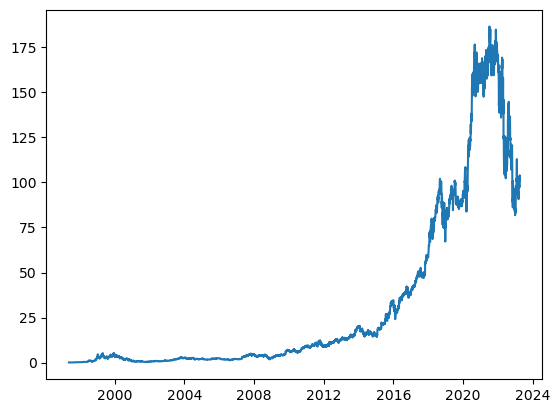

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

# Lets plot the date against the close . 
plt.plot(data['Date'] , data['Close'])

# <a id = "4"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 4 - Exploratory Data Analysis.<br><div> 

# <a id = "4.1"></a>

## <span style="color: #FF4500;"> 4.1 - Closing Prices over time. 
    

In [6]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


## <span style="color: #FF4500;"> In the above output , close = Todays closing price , Close(t-1) = Yesterdays closing price , Close(t-2) = A day before close(t-1) and so on

# <a id = "4.2"></a>
## <span style="color: #FF4500;">4.2 -  Converting the data into a numpy array.

In [7]:
shifted_df_to_np = shifted_df.to_numpy()
shifted_df_to_np


array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

# <a id = "4.3"></a>
## <span style="color: #FF4500;"> 4.3 - Scaling the array.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1,1))
shifted_df_to_np = scaler.fit_transform(shifted_df_to_np)
shifted_df_to_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

# <a id = "4.4"></a>
## <span style="color: #FF4500;"> 4.4 - Defining Dependent and Independent variables

In [9]:
X = shifted_df_to_np[: , 1:] 
Y = shifted_df_to_np[: , 0]

X.shape , Y.shape


((6509, 7), (6509,))

## <span style="color: #FF4500;"> Flipping the Array :

In [10]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

# <a id = "4.5"></a>
## <span style="color: #FF4500;"> 4.5 - Splitting the Array.

In [11]:
# Splitting the dataset as 90% of training and 10% to Testing dataset.
split_index = int(len(X) * 0.90)

split_index

5858

# <a id = "4.6"></a>

## <span style="color: #FF4500;">4.6 - Splitting "X" & "Y".

In [12]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = Y[:split_index]
y_test = Y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5858, 7), (651, 7), (5858,), (651,))

# <a id = "4.7"></a>

## <span style="color: #FF4500;">4.7 -  Adding a new dimension and reshaping the array .  

In [13]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5858, 7, 1), (651, 7, 1), (5858, 1), (651, 1))

# <a id = "4.8"></a>
## <span style="color: #FF4500;"> 4.8 - Converting the data into Tensors float .

In [14]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5858, 7, 1]),
 torch.Size([651, 7, 1]),
 torch.Size([5858, 1]),
 torch.Size([651, 1]))

# <a id = "4.9"></a>
## <span style="color: #FF4500;">4.9 - Creating  custom Classes.

In [15]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [16]:
train_dataset

# <a id = "4.10"></a>
## <span style="color: #FF4500;"> 4.10 -  Iterating Data in Batches.

In [17]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# <a id = "4.11"></a>
## <span style="color: #FF4500;"> 4.11 - Processing the training data.

In [18]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


# <a id = "5"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 5 - Model Building.<br><div> 

# <a id = "5.1"></a>
## <span style="color: #FF4500;"> 5.1 - LSTM model.

In [19]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        # Pass input through LSTM layers
        out, _ = self.lstm(x, (h0, c0))
        
        # Take the last time step's output
        out = self.fc(out[:, -1, :])
        return out

# Create an instance of the LSTM model
model = LSTM(1, 4, 1)

# Move the model to the specified device (e.g., GPU)
model.to(device)

# Print the model architecture
model


LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

# <a id = "5.2"></a>
## <span style="color: #FF4500;"> 5.2 - Training the model.

In [20]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

# <a id = "5.3"></a>
## <span style="color: #FF4500;"> 5.3 - Model Evaluation.

In [21]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

# <a id = "5.4"></a>
## <span style="color: #FF4500;"> 5.4 - Feeding the model.

In [22]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 1.180
Batch 200, Loss: 0.592
Batch 300, Loss: 0.144

Val Loss: 0.162
***************************************************

Epoch: 2
Batch 100, Loss: 0.010
Batch 200, Loss: 0.003
Batch 300, Loss: 0.003

Val Loss: 0.082
***************************************************

Epoch: 3
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.002

Val Loss: 0.083
***************************************************

Epoch: 4
Batch 100, Loss: 0.001
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001

Val Loss: 0.079
***************************************************

Epoch: 5
Batch 100, Loss: 0.002
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.070
***************************************************

Epoch: 6
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.057
***************************************************

Epoch: 7
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.000

Val Loss: 0.045
*****************

# <a id = "6"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 6 - Model Visualizations.<br><div> 

## <span style="color: #FF4500;"> Visualizing the training data.

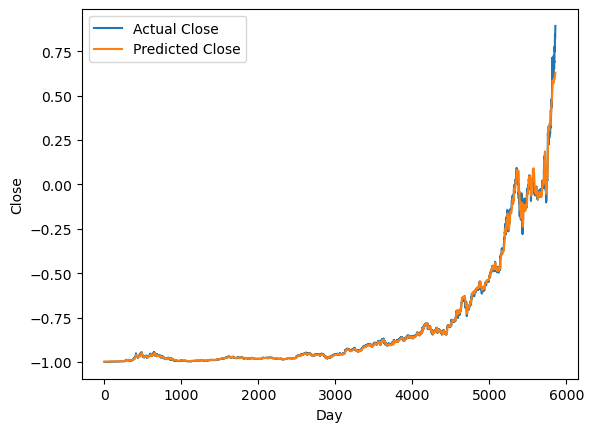

In [23]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# <a id = "6.1"></a>
## <span style="color: #FF4500;"> 6.1 - Removing the applied scaler.

In [24]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.23144052,   0.23008434,   0.22931732, ..., 151.47490612,
       151.66749509, 151.97295286])

In [25]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.72548002e+02, 1.74955992e+02, 1.76572494e+02])

# <a id = "6.2"></a>
## <span style="color: #FF4500;"> 6.2 - Plotting after Removing the applied scaler for Training data.

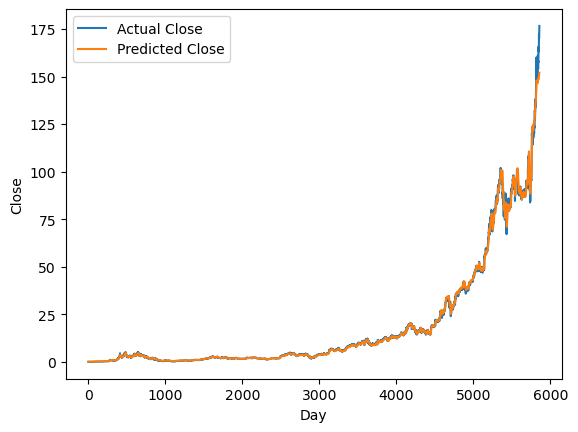

In [26]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

# <a id = "6.2"></a>
## <span style="color: #FF4500;">6.3 - Removing scaled values from Test Predictions .


In [27]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([152.2922837 , 152.43700611, 152.0857772 , 151.58860309,
       151.15503614, 150.82931901, 150.12656104, 149.31936594,
       148.91801388, 148.53084614, 148.08779703, 147.24536343,
       146.62218667, 146.74483222, 146.65406807, 146.25662892,
       146.37297155, 146.93211873, 147.50219318, 147.91852439,
       148.17343659, 148.48684804, 148.75078663, 148.78036696,
       148.74271623, 148.92500599, 149.22588943, 149.7699074 ,
       150.53911829, 150.89895673, 151.16878693, 151.21165118,
       151.08605983, 150.83681136, 150.42117491, 149.95145793,
       149.67591398, 149.49441347, 149.55981035, 149.57138236,
       149.44402353, 149.11258153, 148.48555855, 148.05989525,
       148.24410257, 148.64427076, 149.15502336, 149.08192293,
       148.79728033, 148.83476431, 148.95630934, 148.72996034,
       148.41152435, 148.10338201, 148.02756921, 148.14766358,
       148.06351915, 148.00712643, 147.98582771, 148.15901882,
       148.39857393, 148.56854133, 148.77398067, 149.03

In [28]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([168.39999674, 164.73100188, 157.49200233, 163.43049557,
       158.75549155, 155.81100359, 155.14849755, 157.80650317,
       153.9050009 , 150.4364931 , 147.74550002, 148.02350066,
       156.44949298, 149.99299379, 150.98950412, 154.7564998 ,
       158.7025004 , 157.24400444, 157.43649336, 161.06300192,
       156.25000082, 159.96000907, 154.99800025, 159.78450022,
       159.52749817, 164.33250669, 172.14649963, 172.18150469,
       168.18550321, 166.93249662, 163.63549582, 160.36050519,
       160.85049265, 159.24699637, 158.82000468, 160.2200014 ,
       160.35200682, 164.31649929, 158.13900677, 160.55050963,
       151.80749309, 150.2240005 , 152.42050404, 162.05800044,
       166.1000065 , 165.56849431, 157.18699477, 151.75100589,
       156.86950922, 155.51400528, 156.44050549, 156.55299635,
       156.78300259, 155.27299395, 155.85099984, 154.96999843,
       154.91949732, 155.90300164, 159.25349382, 159.76699769,
       158.40199492, 161.00399689, 160.17649797, 159.33

# <a id = "6.4"></a>
## <span style="color: #FF4500;"> 6.4 - Removing the applied scaler and plotting testing data.

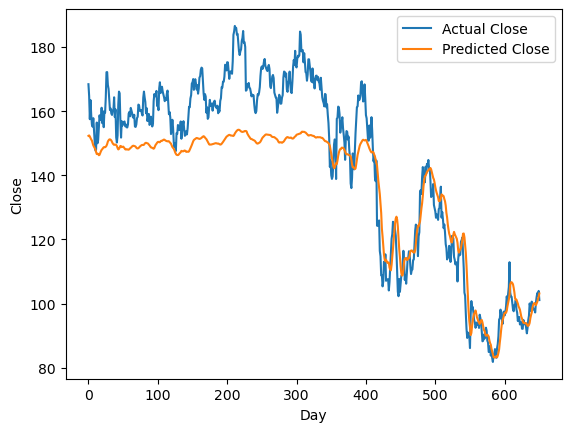

In [29]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# <a id = "7"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 7 - CONCLUSION.<br><div> 
    



## <span style="color: #FF4450;">Based on the Kaggle experiment conducted, an LSTM classification model was developed using a dataset comprising of Amazon stock prices . The model achieved an impressive accuracy even on Training as well on Testing Data, indicating its ability to accurately predict further future values with a minimal error rate . 

# <a id = "8"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 8 - Thank You Note.<br><div> 
    



## <span style="color: #FF4450;"> THANK YOU ; </span>
    
### <span style="color: #FF4450;">I would like to thank you all for iterating the notebook . Feel free to drop reviews or suggestions in the comments sections . Do upvote the notebook if you liked the work I will appreciate that support deeply . Greetings for a blessed day ahead .  

![Alt Text](https://cdn.dribbble.com/users/448124/screenshots/2177658/qq-.gif)